In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

Loading of the dataset and table of the attributes where y is Outcome and X all the other attributes

In [2]:
df = pd.read_csv("data/diabetes.csv")

X = df.drop(columns=["Outcome"])
y = df["Outcome"]

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


Histograms of X attributes

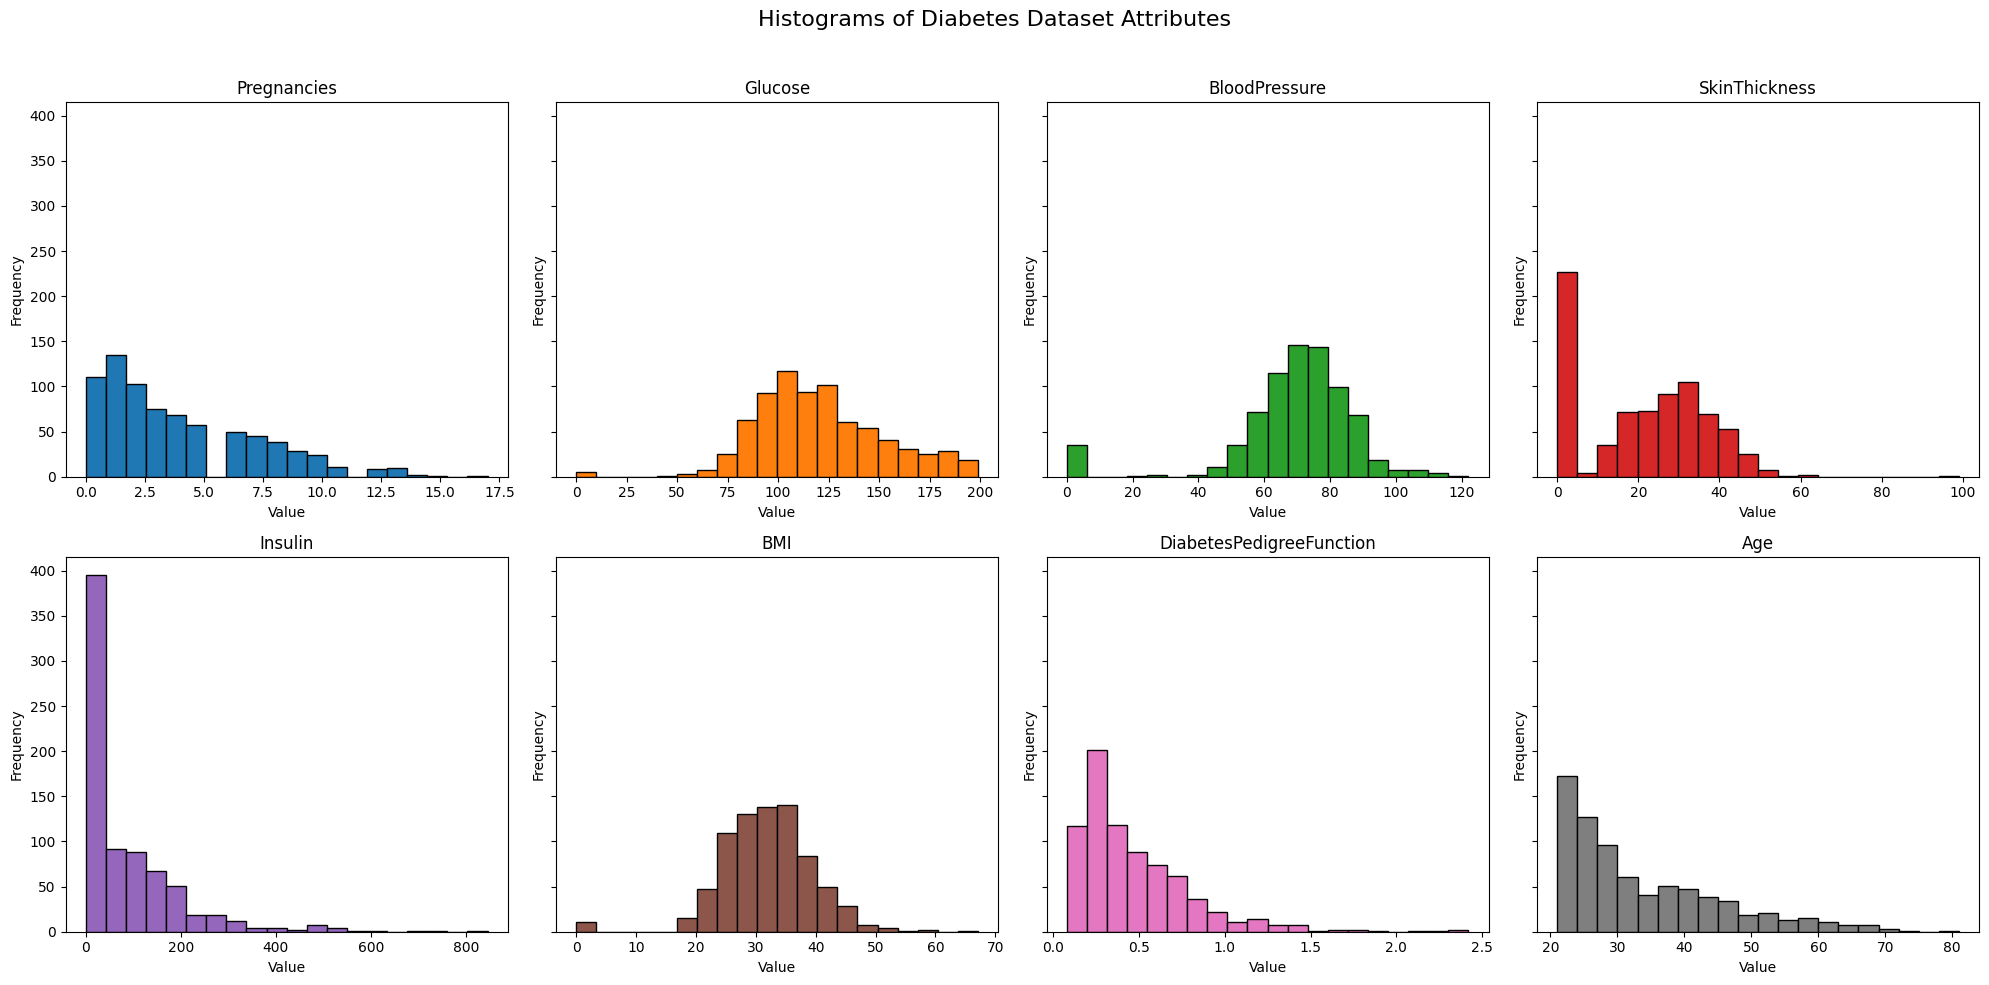

In [3]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10), sharey=True)
fig.suptitle("Histograms of Diabetes Dataset Attributes", fontsize=16)

axs = axs.flatten()  # flatten 2x4 grid into 1D for easy iteration

for j in range(8):  # loop over your 8 columns
    axs[j].hist(X.iloc[:, j], color=f"C{j}", bins=20, edgecolor='black')
    axs[j].set_title(X.columns[j])
    axs[j].set_xlabel("Value")
    axs[j].set_ylabel("Frequency")

plt.tight_layout(rect=[0, 0, 1, 0.96])  # leave space for suptitle
plt.show()

Boxplots of X attributes

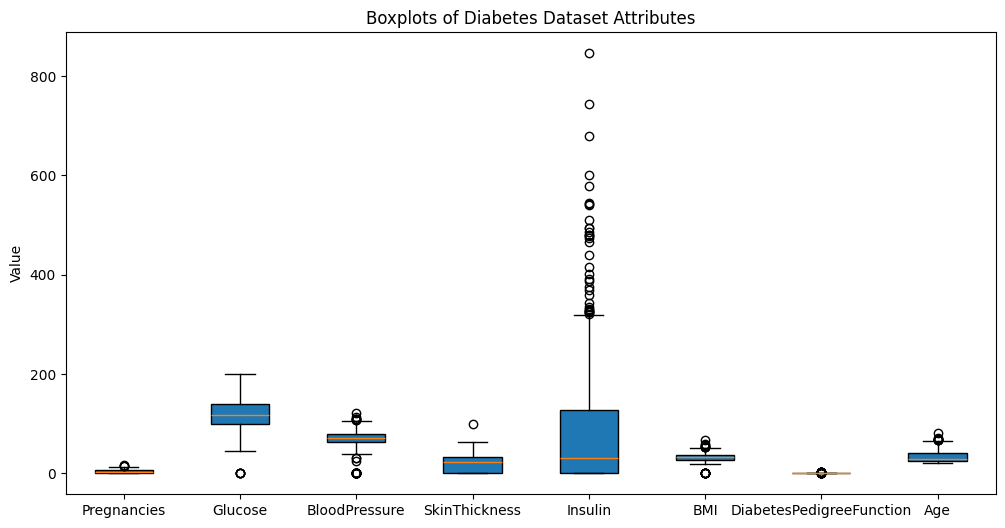

In [7]:
fig = plt.figure(figsize=(12, 6))
plt.title("Boxplots of Diabetes Dataset Attributes")
plt.boxplot([X[col] for col in X.columns], 
            vert=True, patch_artist=True, tick_labels=X.columns)
plt.ylabel("Value")
plt.show()

Scatter matrix of each of the 8 X attributes compared with each other and difference between blue and orange points defining the Outcome

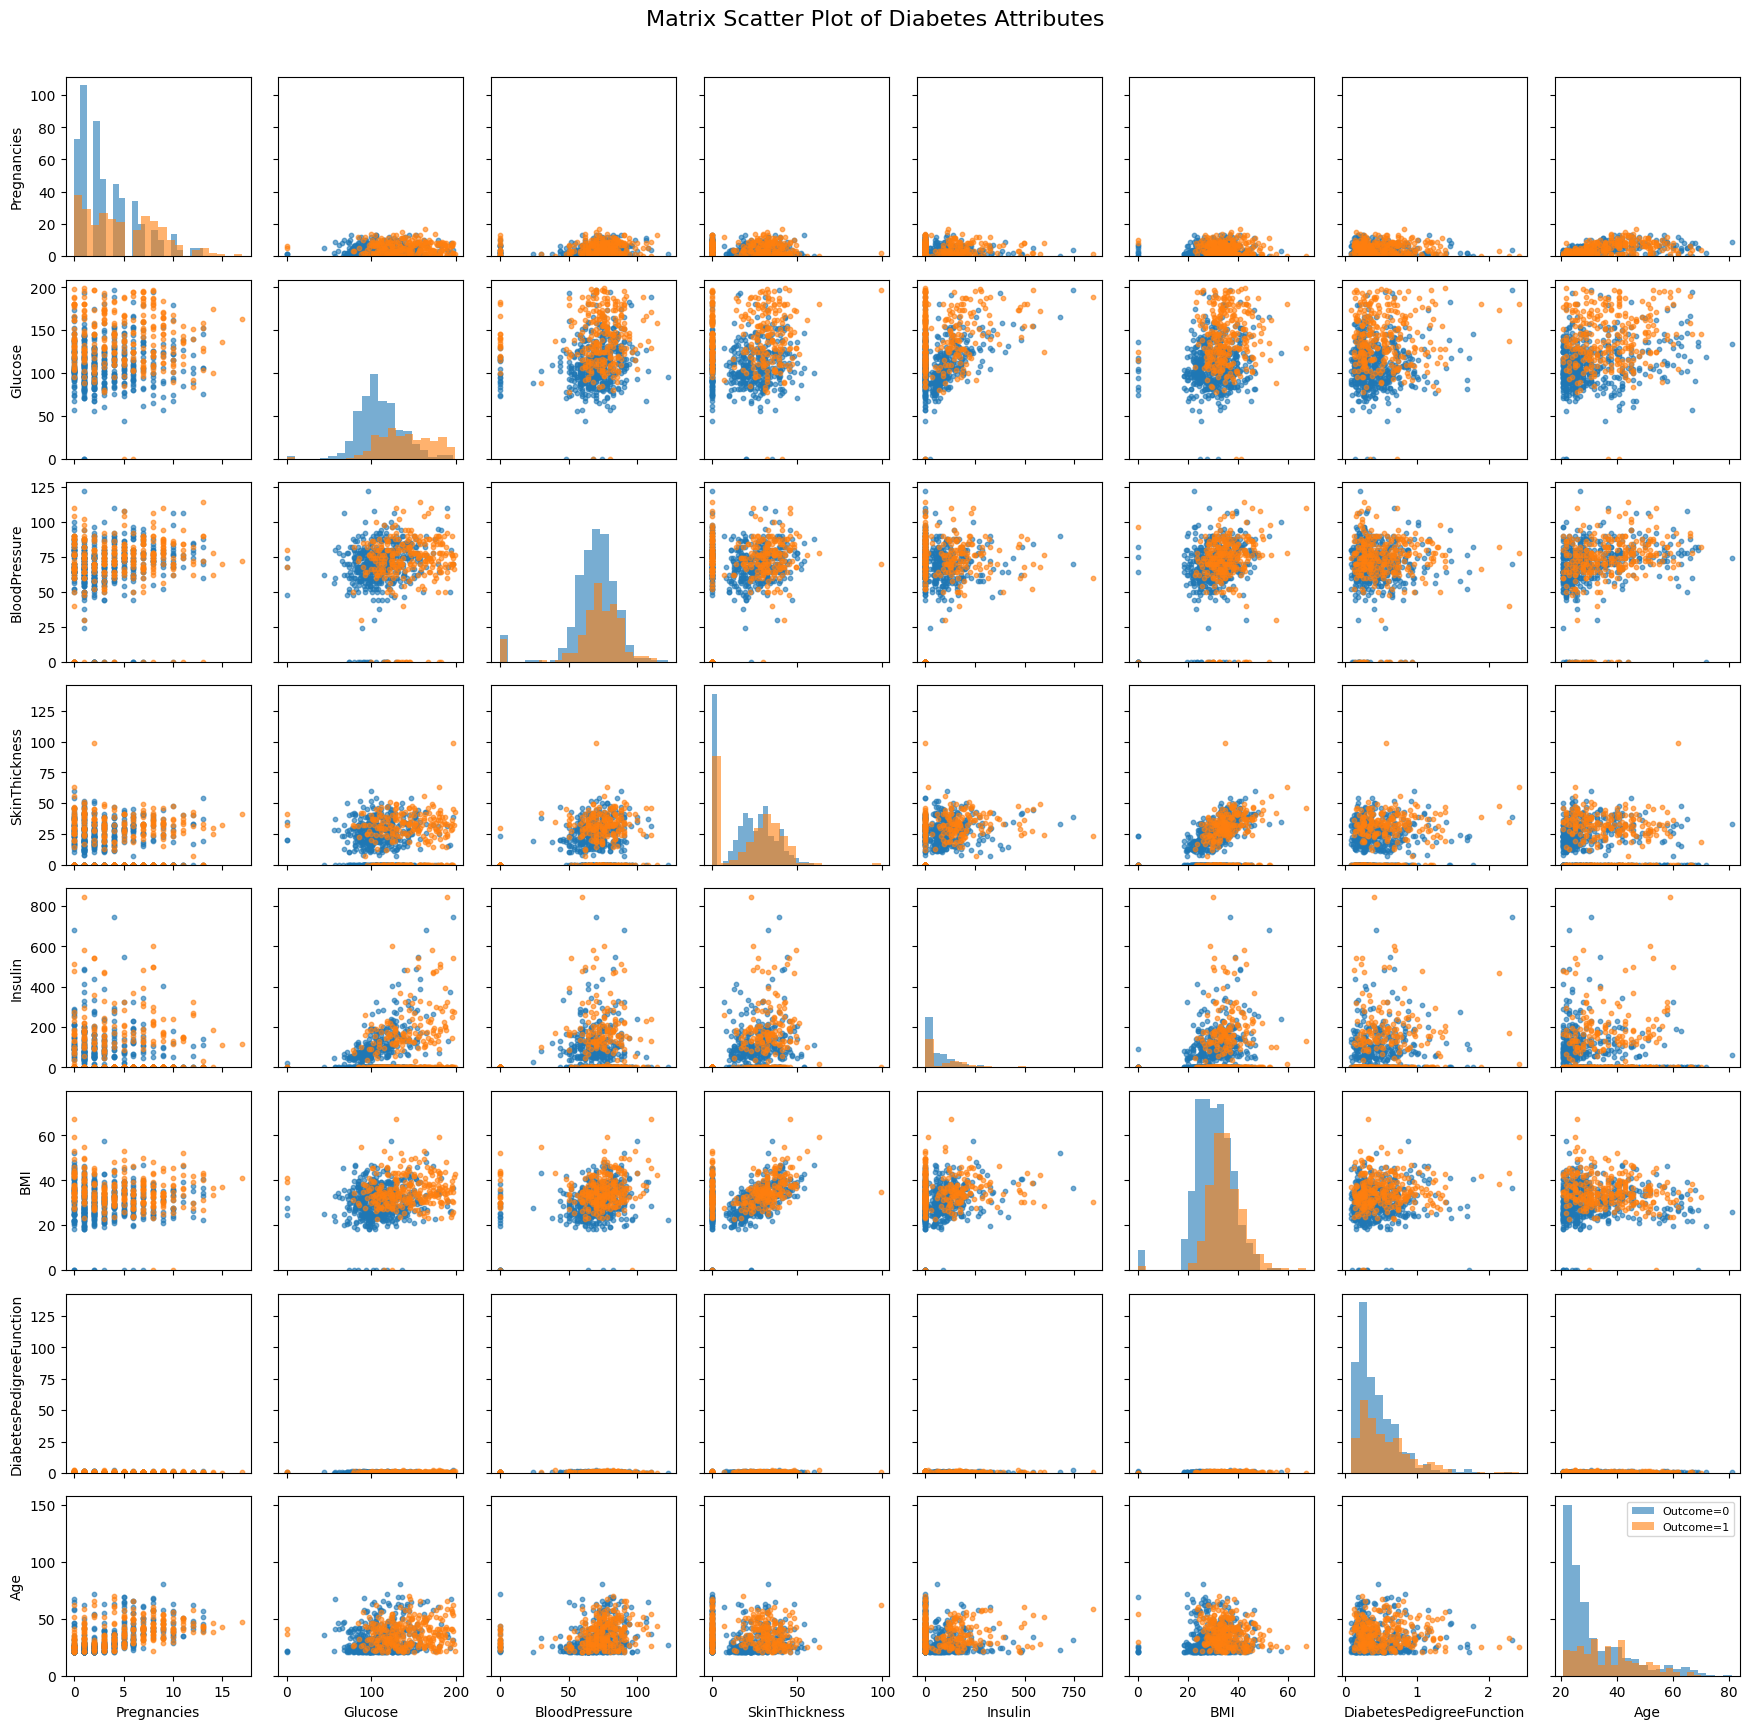

In [21]:
# X = your 8-feature DataFrame
# y = your Outcome Series (0/1)
df_plot = pd.concat([X, y.rename("Outcome")], axis=1)

features = X.columns.tolist()
n = len(features)  # should be 8

fig, axs = plt.subplots(n, n, figsize=(2.2*n, 2.2*n), sharex='col', sharey='row')
fig.suptitle("Matrix Scatter Plot of Diabetes Attributes", fontsize=16)

# Ensure consistent class order
classes = sorted(df_plot["Outcome"].unique())

for i in range(n):
    for j in range(n):
        ax = axs[i, j]
        if i == j:
            # Diagonal: per-class histograms
            for cls in classes:
                subset = df_plot[df_plot["Outcome"] == cls][features[j]]
                ax.hist(subset.dropna(), bins=20, alpha=0.6, label=f"Outcome={cls}")
        else:
            # Off-diagonals: per-class scatter
            for cls in classes:
                subset = df_plot[df_plot["Outcome"] == cls]
                ax.scatter(
                    x=subset[features[j]],
                    y=subset[features[i]],
                    s=10, alpha=0.6, label=f"Outcome={cls}"
                )

        # Only label first column (y labels) and last row (x labels)
        if j == 0:
            ax.set_ylabel(features[i])
        else:
            ax.set_ylabel("")
        if i == n - 1:
            ax.set_xlabel(features[j])
        else:
            ax.set_xlabel("")

# Legend only on the bottom-right subplot
handles, labels = axs[-1, -1].get_legend_handles_labels()
axs[-1, -1].legend(handles, labels, loc='upper right', fontsize=8, frameon=True)

plt.tight_layout(rect=[0, 0, 1, 0.97])  # leave room for suptitle
plt.show()

9x9 matrix with the Outcome attribute addded in the scatter matrix

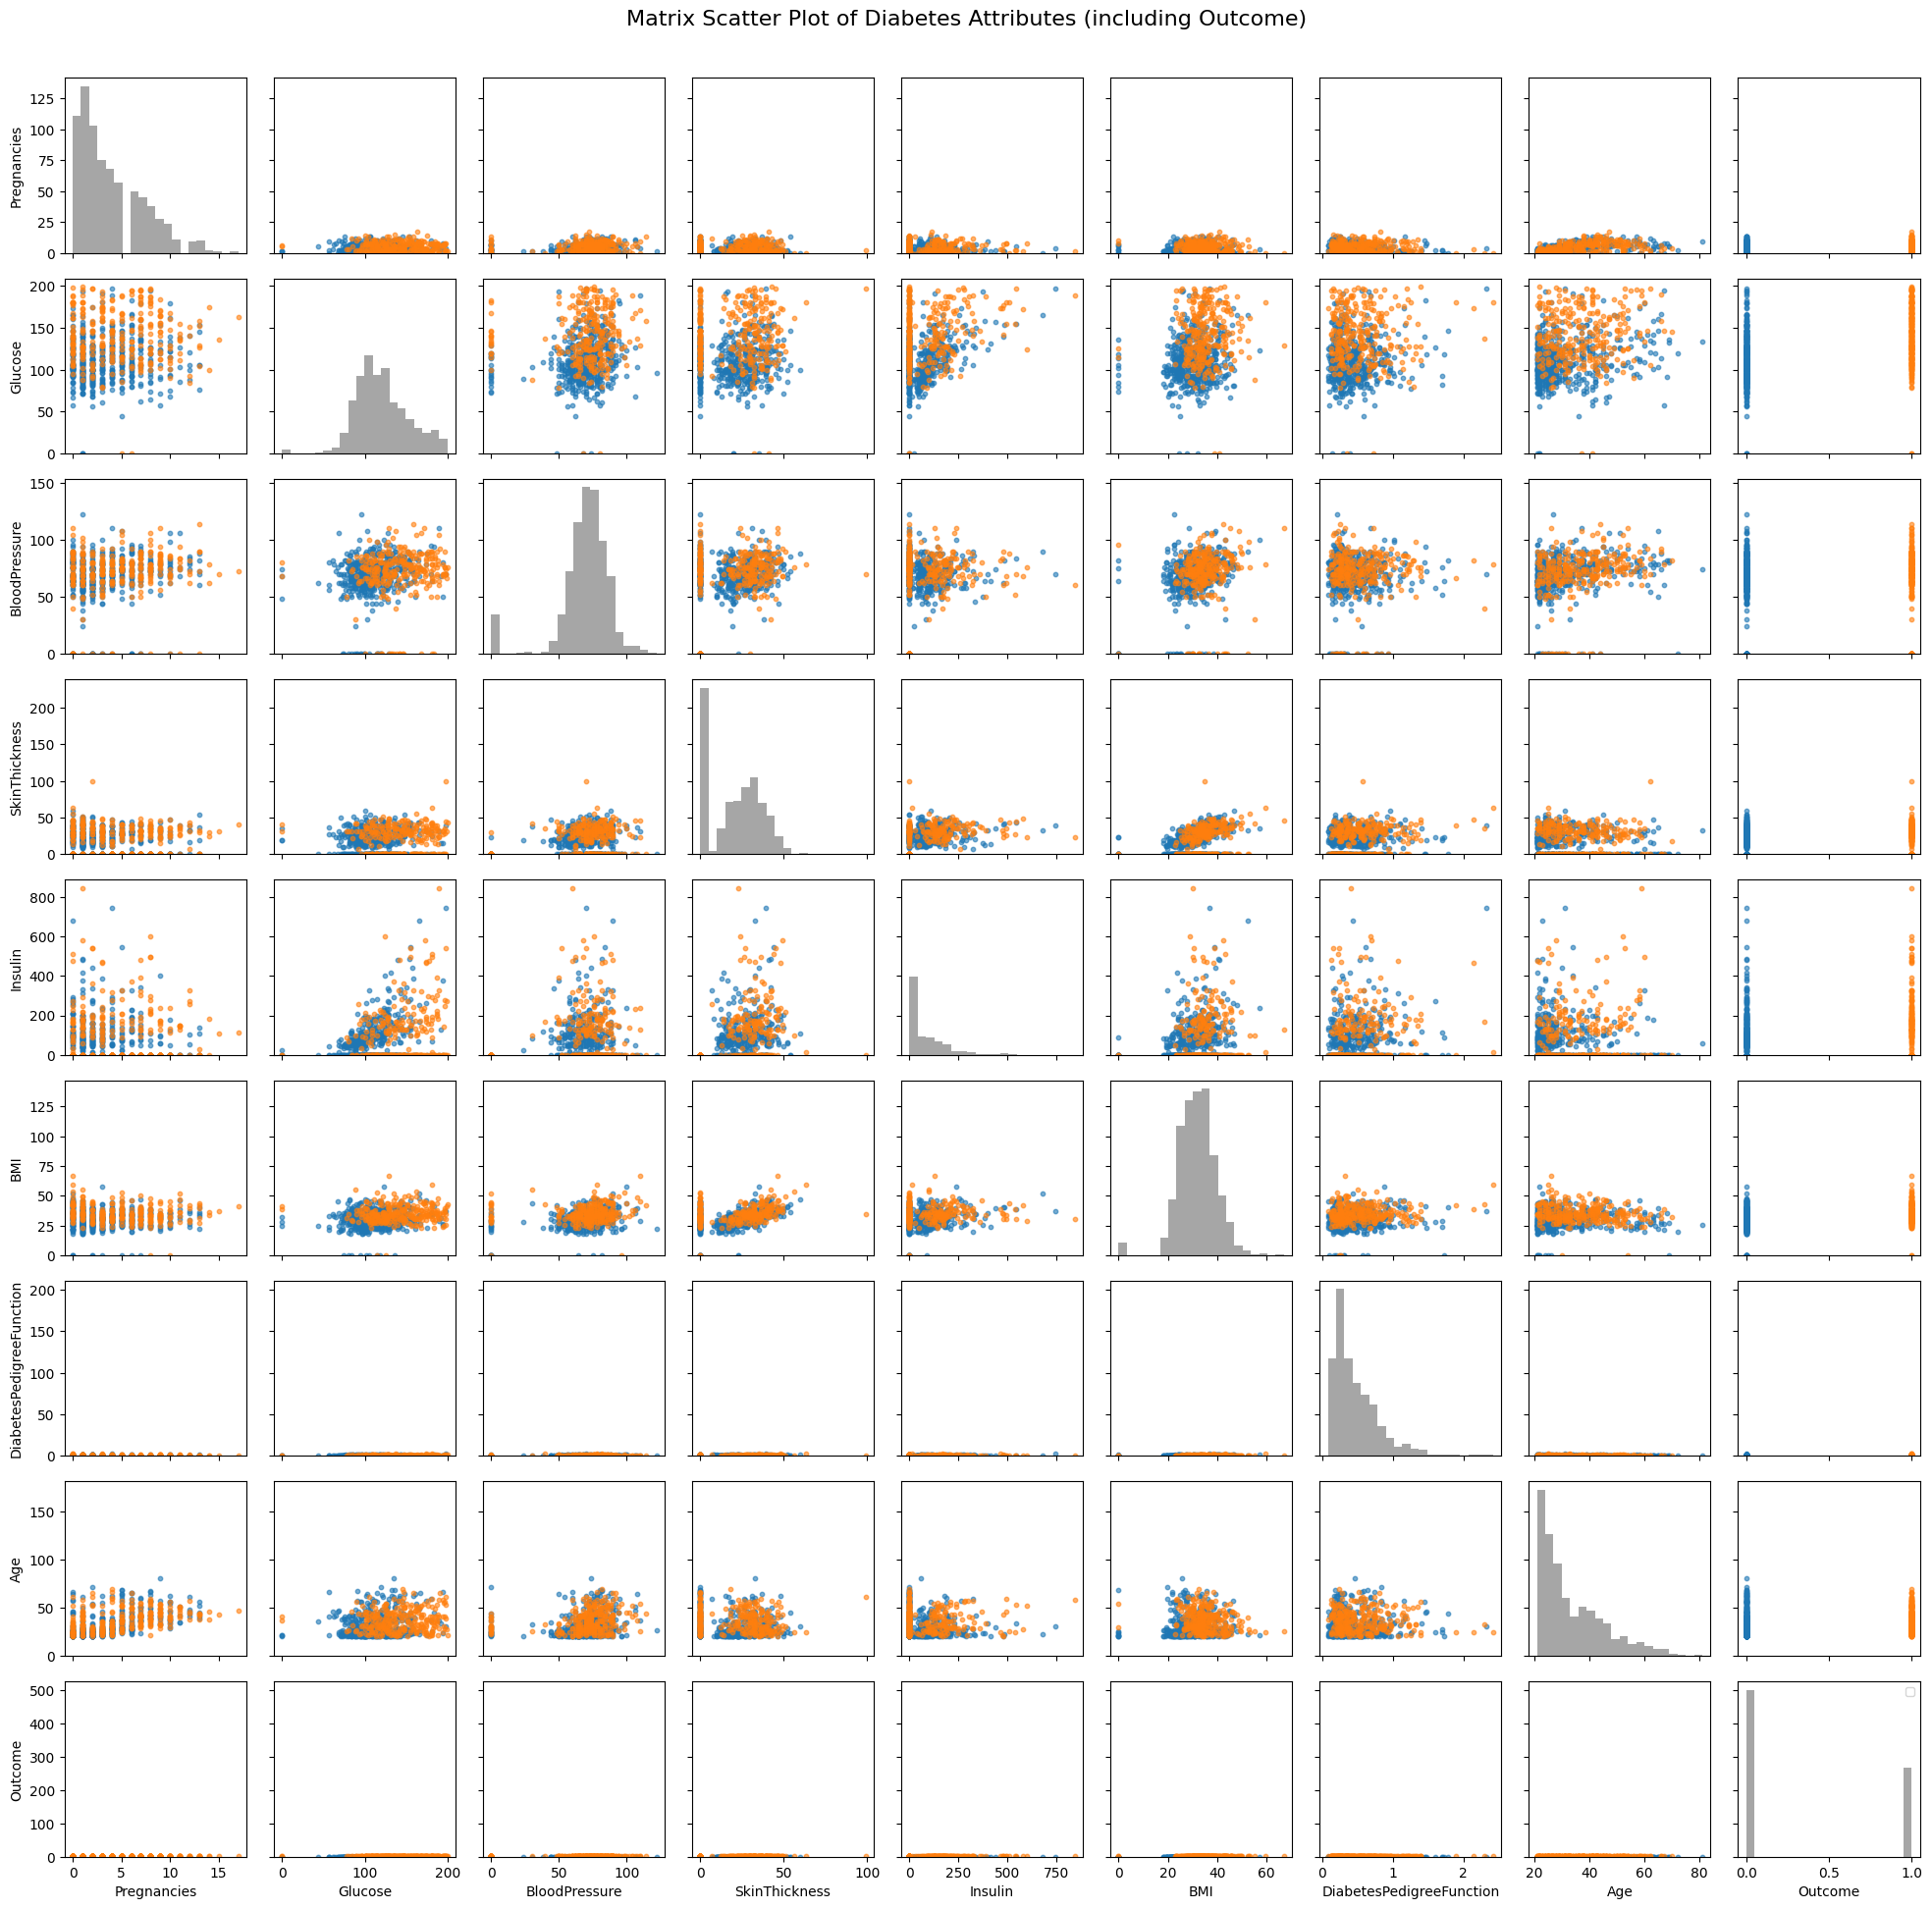

In [22]:

# 1. Load dataset
df = pd.read_csv("data/diabetes.csv")   # adjust path if needed

# 2. Split features (X) and target (y)
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

# 3. If you also want Outcome inside the plotting DataFrame:
df_plot = pd.concat([X, y.rename("Outcome")], axis=1)

features = df_plot.columns.tolist()
n = len(features)  # should be 9 now (8 features + Outcome)

fig, axs = plt.subplots(n, n, figsize=(2.2*n, 2.2*n), sharex='col', sharey='row')
fig.suptitle("Matrix Scatter Plot of Diabetes Attributes (including Outcome)", fontsize=16)

classes = sorted(df_plot["Outcome"].unique())

for i in range(n):
    for j in range(n):
        ax = axs[i, j]
        if i == j:
            # Diagonal: histogram of single attribute
            ax.hist(df_plot[features[j]].dropna(), bins=20, alpha=0.7, color="gray")
        else:
            # Off-diagonals: scatter colored by Outcome
            for cls in classes:
                subset = df_plot[df_plot["Outcome"] == cls]
                ax.scatter(
                    x=subset[features[j]],
                    y=subset[features[i]],
                    s=10, alpha=0.6, label=f"Outcome={cls}"
                )

        # Axis labels
        if j == 0:
            ax.set_ylabel(features[i])
        else:
            ax.set_ylabel("")
        if i == n - 1:
            ax.set_xlabel(features[j])
        else:
            ax.set_xlabel("")

# Legend only on the bottom-right subplot
handles, labels = axs[-1, -1].get_legend_handles_labels()
axs[-1, -1].legend(handles, labels, loc='upper right', fontsize=8, frameon=True)

plt.tight_layout(rect=[0, 0, 1, 0.97])  # leave space for suptitle
plt.show()


Attributes like Glucose, Blood pressure, SkinThickness, Insulin, BMI, and Age shouldn't have a  value 0 because it doesn't make any sense. So we should decide what to do

In [25]:
# 1. Load dataset
df = pd.read_csv("data/diabetes.csv")   # adjust path if needed

# 2. Split features (X) and target (y)
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

(X == 0).sum()        # zeros per column
# or, for a value x:
def count_value_per_col(X, x):
    return (X == x).sum()

count_value_per_col(X, 0)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

We can replace the 0s with NaN, we can calculate a mean, or we can remove the rows with an invalid value of 0 in one of their attributes

In [ ]:
import pandas as pd

# 1. Load dataset
df = pd.read_csv("data/diabetes.csv")

# 2. Split features (X) and target (y)
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

# Columns where 0 means missing
cols_to_check = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age"]

# Total rows before
total_rows = len(X)

# Create mask: True if any of the specified columns == 0
mask = (X[cols_to_check] == 0).any(axis=1)

# Count rows to remove
rows_to_remove = mask.sum()
perc_to_remove = rows_to_remove / total_rows * 100

# Cleaned dataset
X_clean = X[~mask]
y_clean = y.loc[X_clean.index]
remaining_rows = len(X_clean)

print(f"Total rows: {total_rows}")
print(f"Rows to remove: {rows_to_remove} ({perc_to_remove:.2f}% of dataset)")
print(f"Rows remaining: {remaining_rows}")


Total rows: 768
Rows to remove: 376 (48.96% of dataset)
Rows remaining: 392


The only problem if we remove the rows with 0s is that we will have almost 50% of our dataset that has to be elimninated

In [ ]:
#prova di modifica